In [1]:
import torch

In [2]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
training_data = datasets.FashionMNIST(
    root = "data",
    train=True,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 210kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.92MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.77MB/s]


In [4]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download = True,
    transform = ToTensor()
)

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

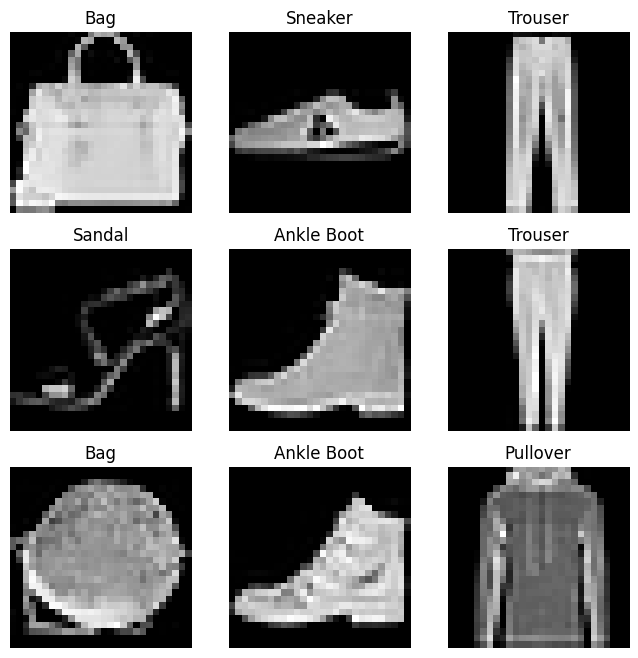

In [9]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [12]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        sample = {"image" : image, "label" : label}
        return sample

In [13]:
from torch.utils.data import DataLoader

# training_data, test_data : 위에서 다운로드 받았던 거...
# batch_size=64는 "한 번에 64개씩 데이터를 가져와서 처리하겠다"는 의미!!
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [16]:
train_features, train_labels = next(iter(train_dataloader))

"""
1. iter(train_dataloader):

DataLoader를 반복자(iterator)로 변환합니다
이제 배치를 하나씩 순차적으로 가져올 수 있게 됩니다

2. next():

반복자에서 다음(첫 번째) 배치 하나만 가져옵니다
전체 데이터가 아니라 batch_size=64개만 가져옵니다

따라서 이 코드는 **"DataLoader에서 배치 하나만 샘플로 뽑아보자"**는 용도로 주로 사용됩니다!
"""

print(f"feature batch shape : {train_features.size()}")
print(f"Labels batch shape : {train_labels.size()}")

feature batch shape : torch.Size([64, 1, 28, 28])
Labels batch shape : torch.Size([64])


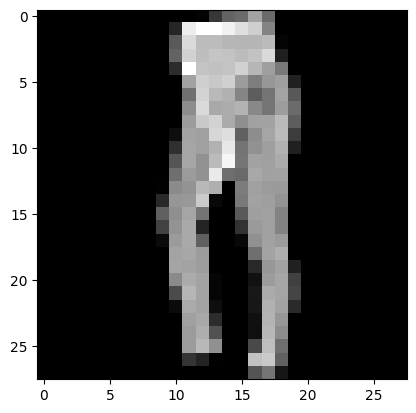

Label : 1


In [18]:
img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap = 'gray')
plt.show()

print(f"Label : {label}")